# Project Customer churn prediction
## Tran Thi Ky Phuong - HCMUS 

**1. Introduction:**

*Customer churn prediction is a critical aspect of business management, particularly for industries like telecommunications, internet service providers, pay TV companies, insurance firms, and alarm monitoring services. It involves understanding and addressing customer attrition, which refers to the loss of clients or customers.*

**2. Problem Statement:**

*For businesses in these sectors, measuring customer attrition is a vital business metric. This is because retaining an existing customer is significantly more cost-effective than acquiring a new one. As a result, these companies often have customer service branches dedicated to re-engaging customers who are considering leaving. This is because the long-term value of recovered customers far outweighs that of newly acquired ones.*
*To address customer churn, predictive analytics comes into play, churn prediction models to assess the likelihood of customers leaving. These models prioritize a small list of potential defectors, enabling businesses to concentrate their customer retention efforts on those who are most at risk of churning.*

**3.  Key Questions:**
 - *What is the significance of Churn Rate for stakeholders (Customers, MCI, etc.)?*
 - *What are the characteristics of each Type of Customer (Churn or Not Churn)?*
 - *Which ML modeling can be implemented and represent model results? including features input and explaining features important.*
 - *What actions regarding qualitative and quantitative analytics could be implemented to enhance retention rate?*
 - *This analysis aims to leverage comprehensive customer data to improve customer engagement and satisfaction for MCI's offerings.*


In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from numpy import mean
from numpy import std

### Data Preparation

In [179]:
df = pd.read_csv('D:\Thuc Hanh\-Customers-Churned\Data\customer_churn_data.csv')
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\TranPhuong\AppData\Local\Temp\ipykernel_4772\813634764.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Thuc Hanh\-Customers-Churned\Data\customer_churn_data.csv')


**Data Dictionary**
- *customer_id*: This is the customers’ unique id which identifies them bankwide.
- *credit_score*: this is the rating of the customers’ credit worthiness, generated based on the information on their credit report.
- *country*: This is the country the customer hails from.
- *gender*: This is the sex of the customer, grouped into male and female.
- *age*: This refers to the customer’s age.
- *tenure*: The number of years of relationship this customer has maintained with the bank.
- *balance*: The deductible balance on their bank account as at time this data was generated.
- *products_number*: This shows the bank account type the customer has.
- *credit_card*: This column shows if a customer has a credit card or not, represented as either 1 or 0 respectively.
- *active_member*: These numerical values show whether an account is active or not, represented as either 1 or 0 respectively.
- *estimated_ salary*: This is the average annual salary received into the account.
- *churn*: This field shows if the customer is still with the bank or not, represented by either 0 or 1 respectively

In [180]:
print(df.dtypes)

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


In [181]:
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [182]:
#Otpion check data missing Percent: 
total = df.isnull().sum().sort_values(ascending = False)
# Sum / count = percent
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_df_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df_data.head(10)

,Total,Percent
customer_id,0,0.0
credit_score,0,0.0
country,0,0.0
gender,0,0.0
age,0,0.0
tenure,0,0.0
balance,0,0.0
products_number,0,0.0
credit_card,0,0.0
active_member,0,0.0


*How to handle missing data:*
- Delete rows containing missing values:

```python
df = df.dropna()
```

- Fill in missing values ​​with mean, median, or mode:

```python
df['column_name'] = df['column_name'].fillna(df['column_name'].mean())
df['column_name'] = df['column_name'].fillna(df['column_name'].median())
df['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])
```

In [183]:
print(df.info)

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

In [184]:
print(df.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

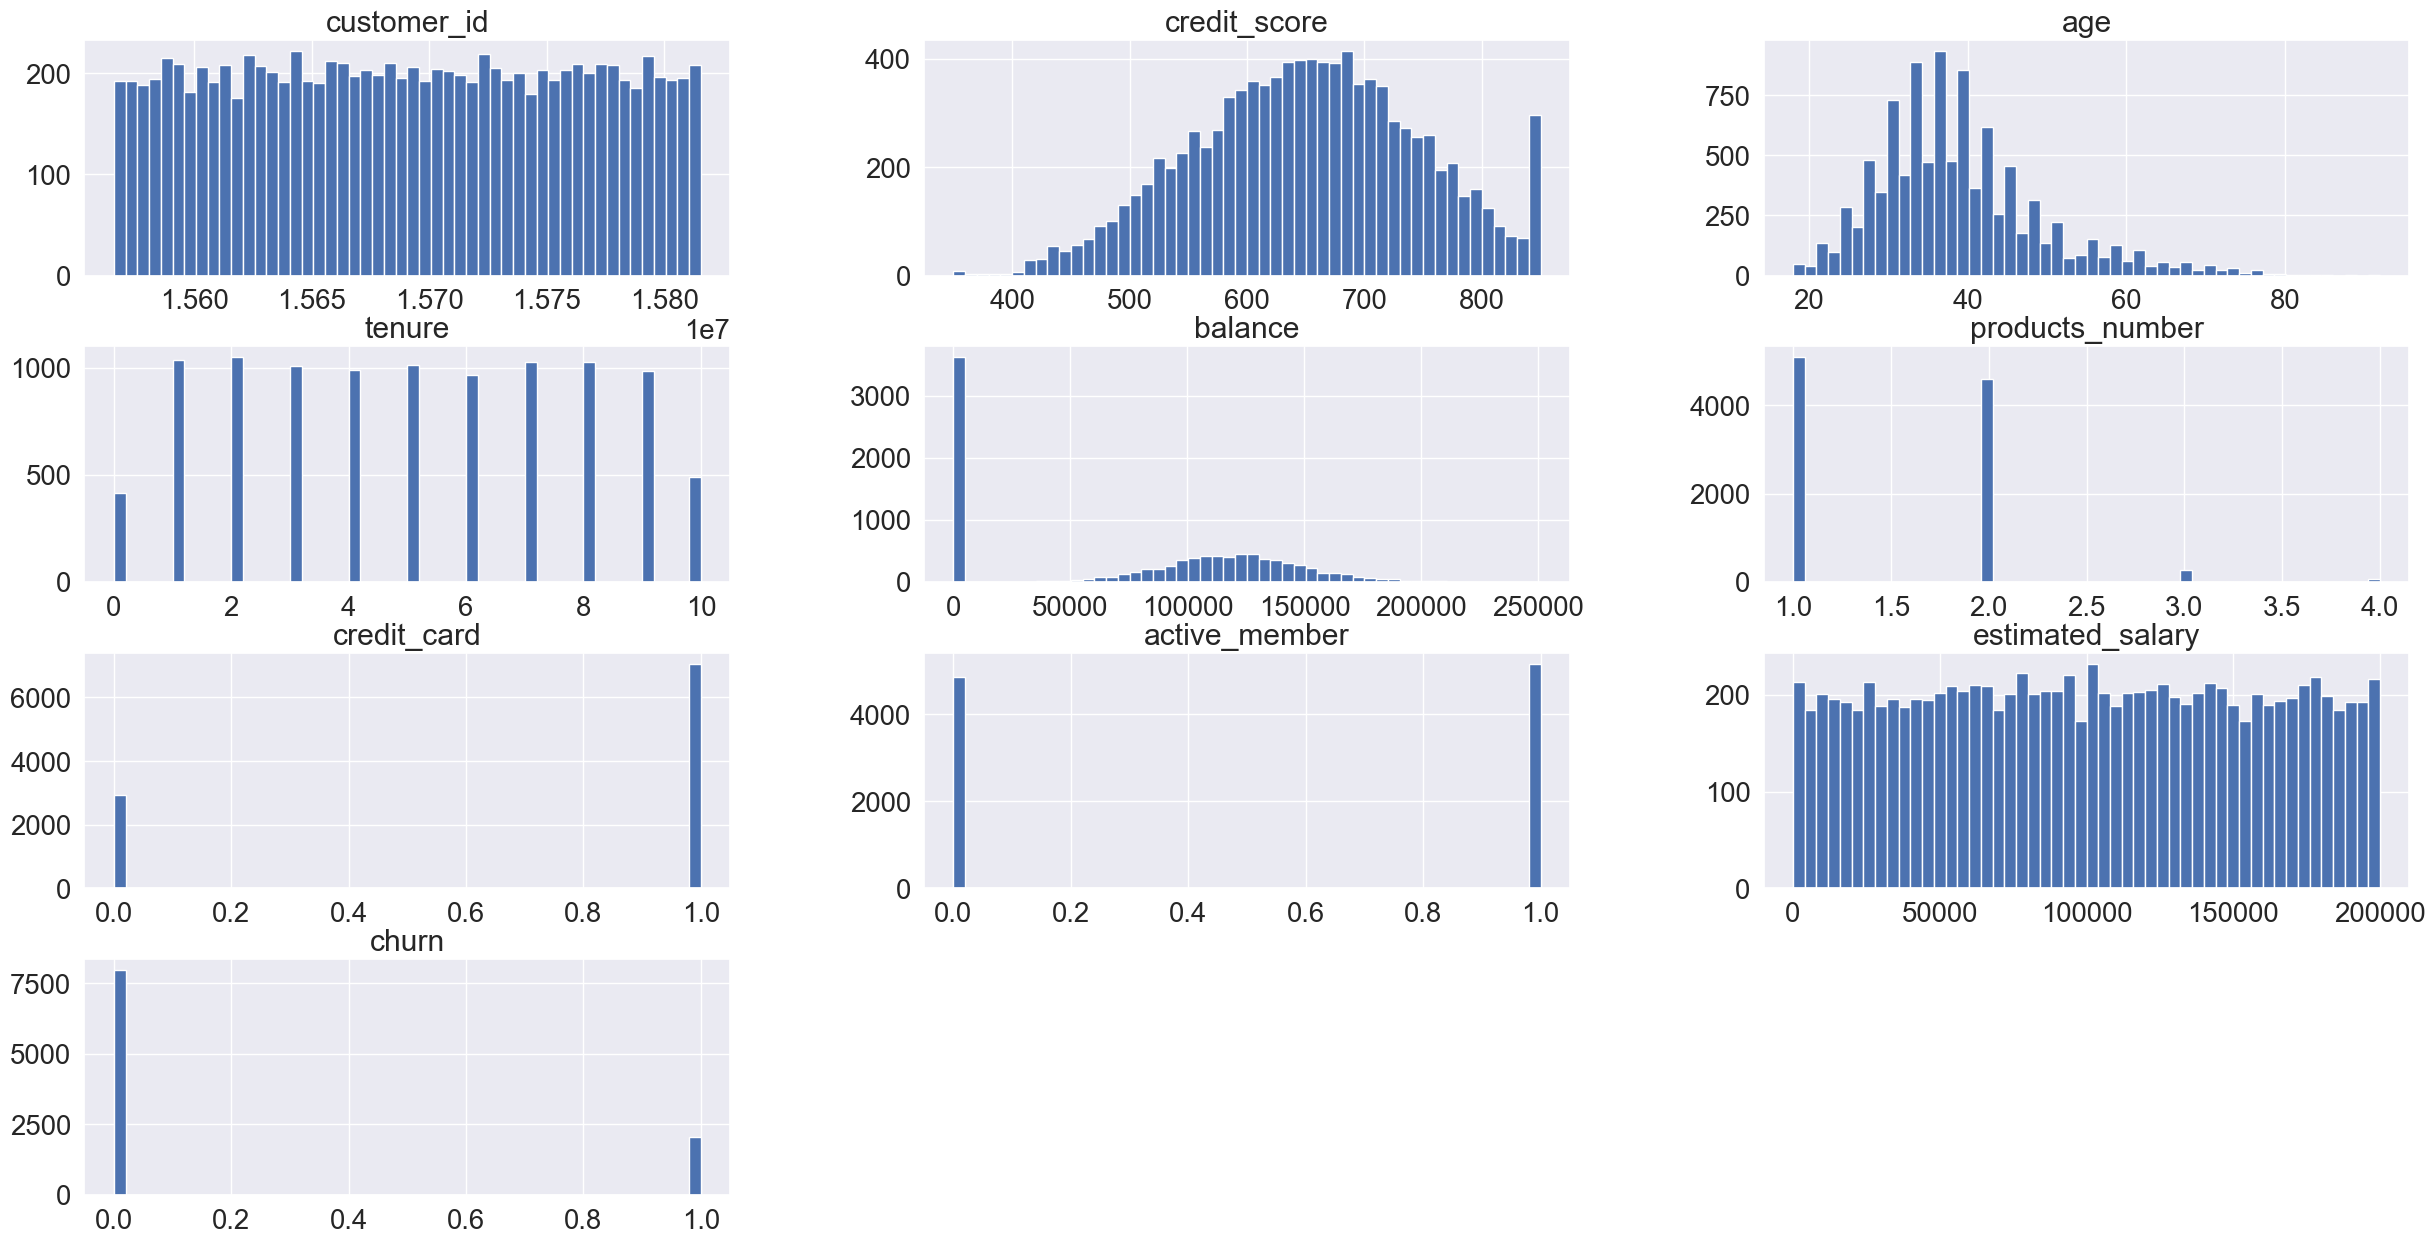

In [185]:
# check phân bố dữ liệu
df.hist(bins=50,figsize=(30, 15))
plt.show()

In [186]:

# Lấy ra những cột dạng numeric trong data
numeric = df.select_dtypes(exclude='object')

cols_to_check = [col for col in numeric.columns if col not in ['RowNumber', 'CustomerId', 'Exited']]
cols_to_check

['customer_id',
 'credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

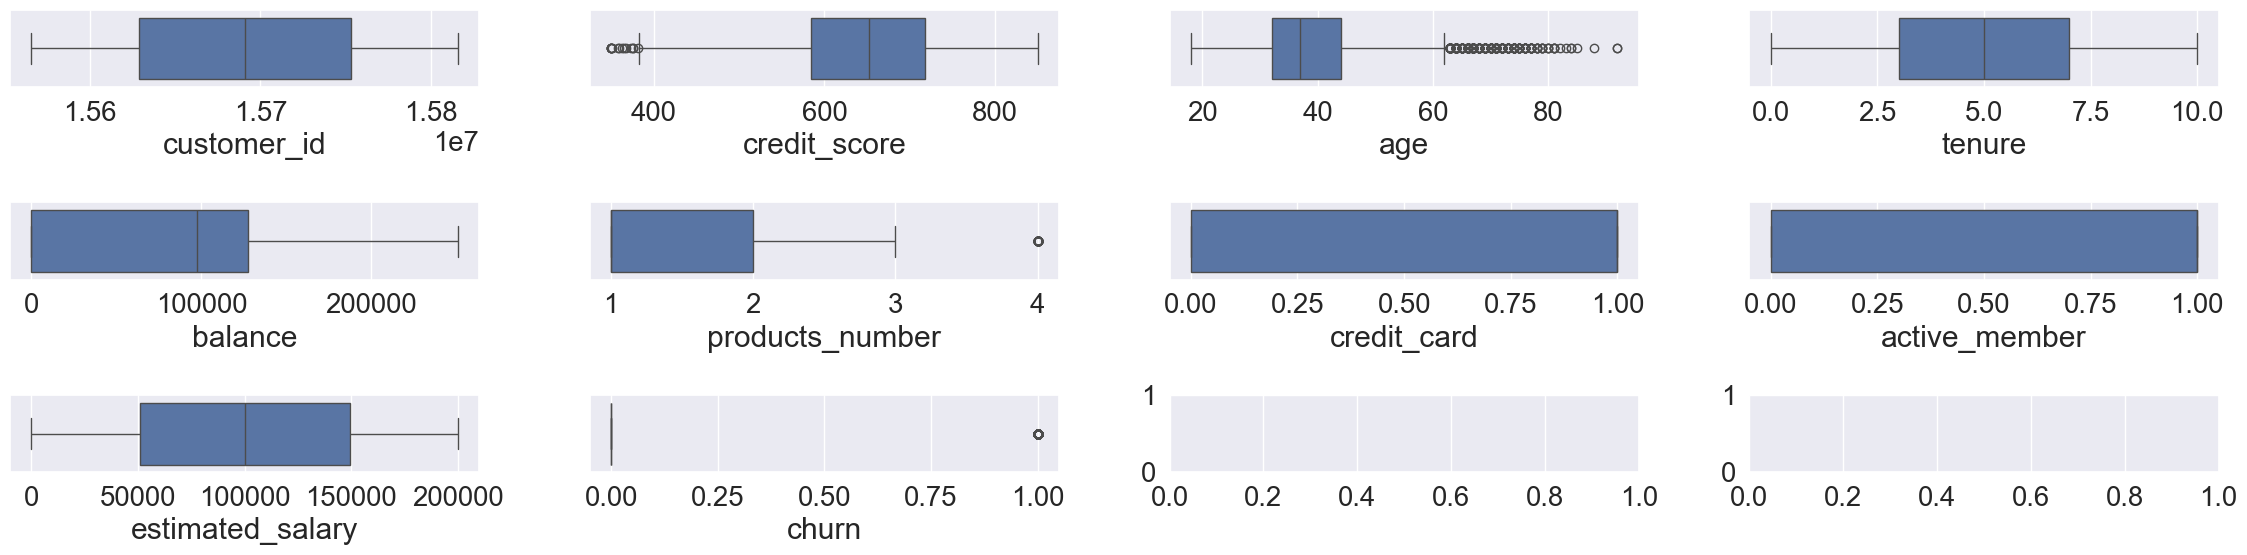

In [187]:
# visualize outliers sử dụng boxplot

fig, ax = plt.subplots(3, 4, figsize = (23, 6))
ax = ax.flatten()
for i, c in enumerate(cols_to_check):
    sns.boxplot(x = df[c], ax = ax[i])
fig.tight_layout()

### Data Cleaning

Ouliers:
- credit_score (Customer's Credit Score): This feature contains outliers in the range [350, 380].

- Age (Customer's Age): This feature contains outliers in the range [63, 92].

- products_number (Number of Products Used by the Customer): This feature contains an outlier at the point 4.0.

In [188]:
# outlier columns
outlier_cols = ["credit_score", "age", "products_number"]

1. Handling Outliers using IQR

![My Image](https://www.machinelearningplus.com/wp-content/uploads/2023/07/93ae3b25-d59b-4cef-ab17-a2af415d59cd.jpg)

In [189]:

def outlier_thresholds(dataframe, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    return lower_limit, upper_limit

def HandleOutliers(df):
    for col in outlier_cols:
        lower_limit, upper_limit = outlier_thresholds(df, col)
        print(f"{col} has {df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]} outliers")
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [190]:
df_IQR= HandleOutliers(df)

credit_score has 15 outliers
age has 359 outliers
products_number has 58 outliers


In [191]:
df_IQR 

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


2. Handling Outliers using Z-score
![My Image](https://i.sstatic.net/YHe3C.png)

In [192]:
def Zscore_Outlier(data,variable):
        mean_data = mean(data[variable])
        std_data = std(data[variable])
        lower_limit = mean_data - 3*std_data
        upper_limit = mean_data + 3*std_data
        
        return lower_limit, upper_limit
def Zscore_HandleOutliers(df):
    for col in outlier_cols:
        lower_limit, upper_limit = Zscore_Outlier(df, col)
        print(f"{col} has {df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]} outliers")
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [193]:
df_Zscore= Zscore_HandleOutliers(df)

credit_score has 8 outliers
age has 133 outliers
products_number has 60 outliers


In [194]:
df_Zscore

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Feature Engineering

1. Encode features

In [195]:
df["country"].value_counts()


country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [196]:
df["gender"].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [197]:
from sklearn.preprocessing import OneHotEncoder

# encoder column
encoder_1 = OneHotEncoder(handle_unknown='ignore')
encoder_df_1 = pd.DataFrame(encoder_1.fit_transform(df[['country']]).toarray())
encoder_df_1.columns = df["country"].unique()

# join to original df
df = df.join(encoder_df_1)

In [198]:
from sklearn.preprocessing import LabelEncoder

# encoder column
encoder_2 = LabelEncoder()
encoded_gender = encoder_2.fit_transform(df['gender'])
encoder_df_2 = pd.DataFrame(encoded_gender, columns=['gender_encoded'])

# join to original df
df = df.join(encoder_df_2)
                    

In [199]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France,Spain,Germany,gender_encoded
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0.0,0.0,1.0,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1.0,0.0,0.0,1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.0,1.0,0.0,0
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1.0,0.0,0.0,1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1.0,0.0,0.0,1


### Feature Selection

1. Correlation Coefficient

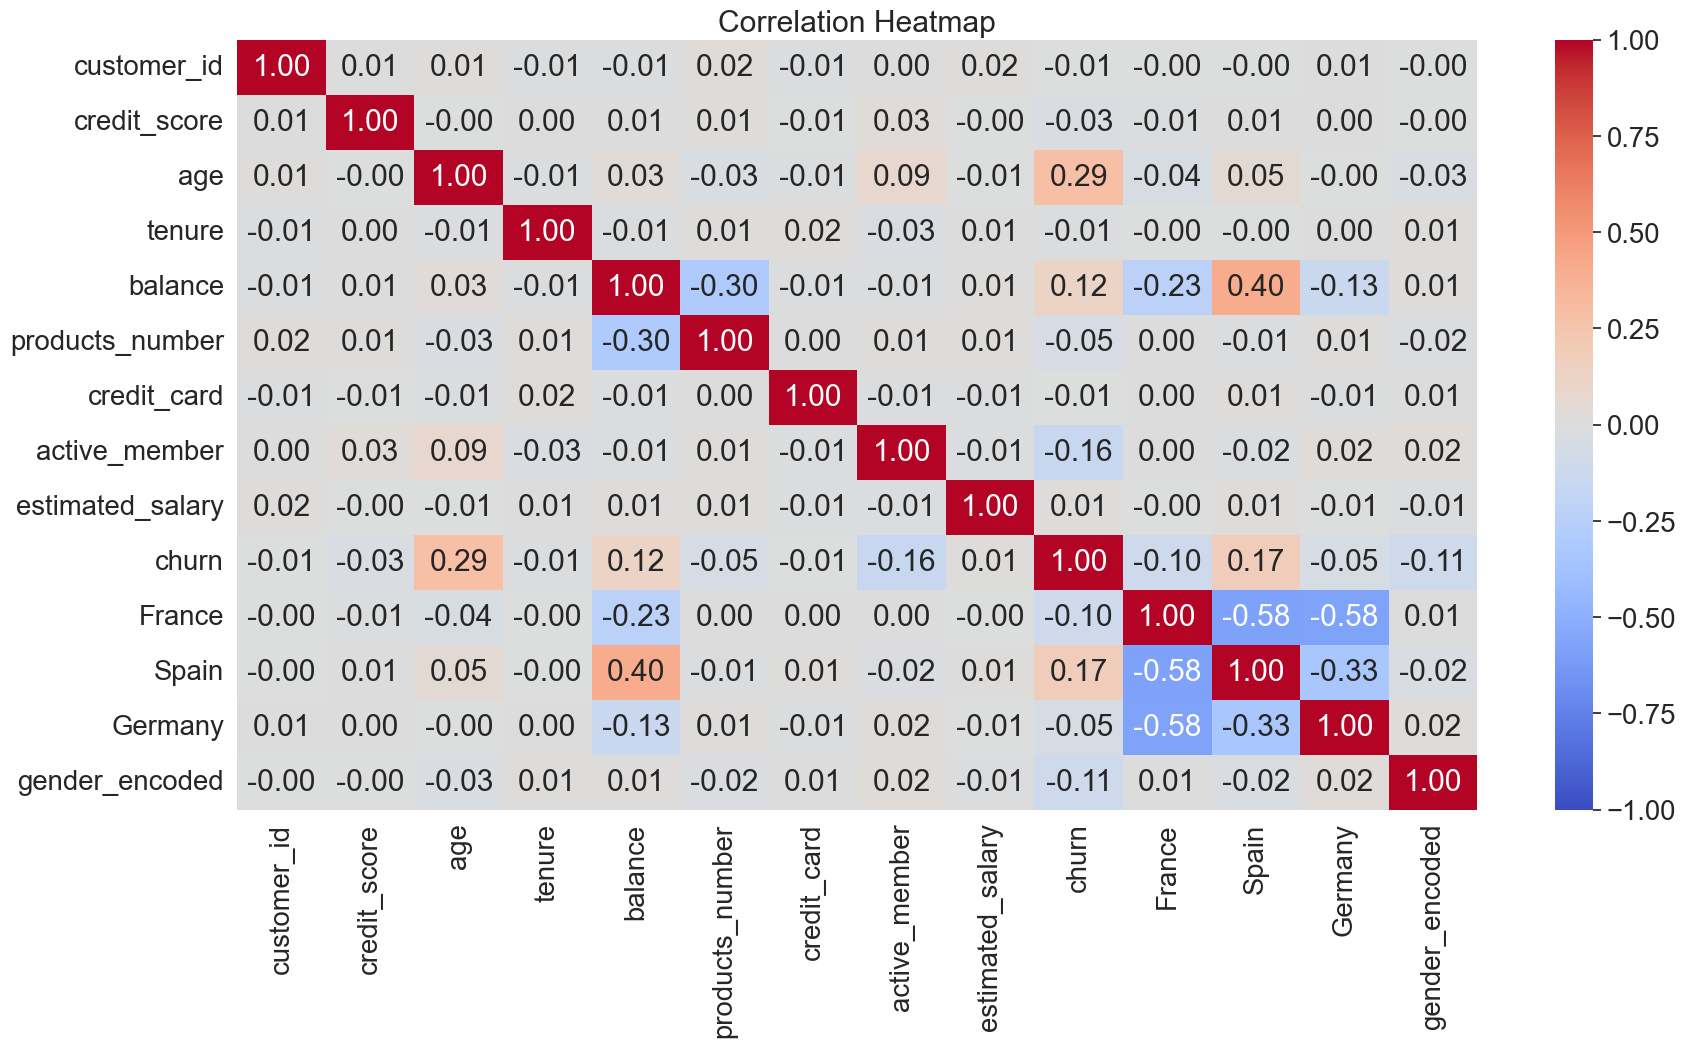

In [226]:
numeric_feature = df.select_dtypes(exclude='object')
corr_matrix = numeric_feature.corr()

# Vẽ heatmap

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

2. ANOVA

In [201]:
from sklearn.feature_selection import SelectKBest, f_classif

continous_features = df[["credit_score", "balance", "estimated_salary"]]
best_features = SelectKBest(f_classif, k=3)
best_features.fit(continous_features , df["churn"])

SelectKBest(k=3)

In [202]:
SelectKBest(k=3)

SelectKBest(k=3)

In [203]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['anova_values'] = best_features.scores_
df_score['columns'] = ["credit_score", "balance", "estimated_salary"]
df_score.sort_values(by='p_values')

,p_values,anova_values,columns
1,1.275563e-32,142.473832,balance
0,6.738214e-03,7.344522,credit_score
2,2.264404e-01,1.463262,estimated_salary


3. Chi-square

In [204]:
from sklearn.feature_selection import SelectKBest, chi2

categorical_features = df[["France", "Spain", "Germany", "gender_encoded", "tenure", "products_number", "credit_card", "active_member", "age"]]


best_features = SelectKBest(chi2, k=9)
best_features.fit(categorical_features, df["churn"])


SelectKBest(k=9, score_func=<function chi2 at 0x000001F2B5C38540>)

In [205]:
df_score = pd.DataFrame(best_features.pvalues_,columns=['p_values'])
df_score['chi2_values'] = best_features.scores_
df_score['columns'] = ["France", "Spain", "Germany", "gender_encoded", "tenure", "products_number", "credit_card", "active_member", "age"]
df_score.sort_values(by='p_values')

,p_values,chi2_values,columns
8,0.000000e+00,2300.417477,age
1,5.814572e-51,225.464426,Spain
7,1.568036e-27,118.199414,active_member
0,1.253006e-13,54.923705,France
3,7.015575e-13,51.539926,gender_encoded
2,4.922505e-06,20.867206,Germany
5,2.454940e-02,5.055394,products_number
4,7.053449e-02,3.270538,tenure
6,6.984962e-01,0.150041,credit_card


### Data Scaling 

In [206]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ["age", "balance"]
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df[cols_to_scale]

,age,balance
0,0.324324,0.000000
1,0.310811,0.334031
2,0.324324,0.636357
3,0.283784,0.000000
4,0.337838,0.500246
...,...,...
9995,0.283784,0.000000
9996,0.229730,0.228657
9997,0.243243,0.000000
9998,0.324324,0.299226


### Model Building

In [207]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [208]:
sns.set(font_scale=1.8)

In [209]:
input = df[["France", "Spain", "Germany", "gender_encoded", "products_number", "active_member", "age", "balance"]].to_numpy()

In [210]:
input.shape

(10000, 8)

In [211]:
y = df["churn"].to_numpy()

In [212]:
y.shape

(10000,)

1. Logistic Regression

In [213]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1710)

train_index, val_index = next(iter(sss.split(input, y)))
X_train, X_test = input[train_index], input[val_index]
y_train, y_test = y[train_index], y[val_index]

In [214]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [215]:
y_pred = logreg.predict(X_test)

In [216]:
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=["leave", "stay"]))

Accuracy = 0.813
              precision    recall  f1-score   support

       leave       0.83      0.97      0.89      1593
        stay       0.63      0.20      0.30       407

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.60      2000
weighted avg       0.79      0.81      0.77      2000



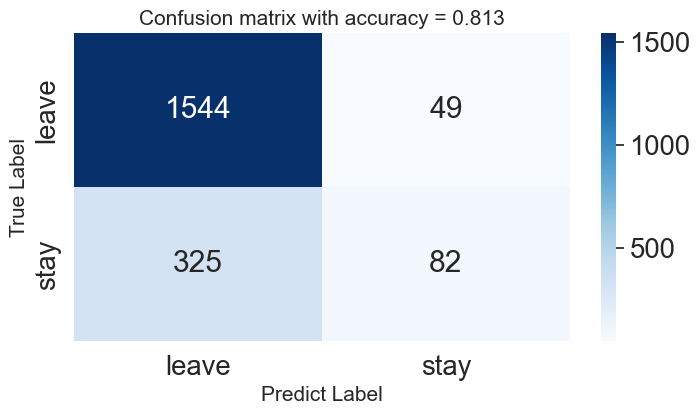

In [229]:
logreg_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
plt.title("Confusion matrix with accuracy = {0}".format(accuracy_score(y_test, y_pred)), size=15)
ax = sns.heatmap(logreg_cm, annot=True, fmt="g", cmap="Blues", xticklabels=["leave", "stay"], yticklabels=["leave", "stay"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_xlabel("Predict Label", fontsize=15)
plt.show()

### Data Categorization and Grouping

In [218]:
# # Age group
# bins_age = [0, 20, 30, 40, 50, 60, 70, 100 ]  
# label = ['<20', '21-30', '31-40', '41-50','51-60','61-70','>71'] 

# df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=label)

# # Balance group
# bins_balance = [0, 1000, 10000,100000,200000,float('inf')]
# labels = ['0', '1k-10k', '10k-100k', '100k-200k','>200k'] 

# df['balance_group'] = pd.cut(df['balance'], bins=bins_balance, labels=labels)

# # credit score
# bins_credit = [0,400 ,500 ,600 ,700 ,800, float('inf')]
# labelss = ['<400', '400-500', '500-600', '600-700','600-800','>800']  

# df['balance_group'] = pd.cut(df['balance'], bins=bins_credit, labels=labelss)

# print(df)



2. Data Grouping

In [219]:
# # Group by country and average the age
# grouped = df.groupby('country')['age'].mean()
# print(grouped)

In [220]:
# # Group by country and average the balance
# grouped = df.groupby('country')['balance'].mean()
# print(grouped)

In [221]:
# #Group by country and average the credit_score
# grouped = df.groupby('country')['credit_score'].mean()
# print(grouped)

In [222]:
# # total 
# stats = df.groupby('country').agg({
#     'age': ['mean', 'min', 'max'],
#     'balance': ['sum', 'mean'],
#     'credit_score':['sum','mean']})

# print(stats)

1. What is the significance of Churn Rate for stakeholders (Customers, MCI, etc.)
- Customers Churn Rate by Age
- Customers Churn Rate by Credit Score
- Customers Churn Rate by Acct Balance

In [223]:
# # Customers Churn Rate by Age 

# age_group_stats = df.groupby('age_group').agg(
#     churn_count=('churn', 'sum'),
#     total_count=('churn', 'size')
# )

# # Tính tỷ lệ churn theo nhóm tuổi
# age_group_stats['churn_rate'] = age_group_stats['churn_count'] / age_group_stats['total_count'] * 100
# age_group= df['age_group'].value_counts()
# print(age_group)
# #

# age_group_stats['churn_rate'].plot(kind='line', color='black')
# age_group.plot(kind='bar', color='pink')

# plt.title('Churn Rate by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Churn Rate (%)')
# plt.xticks(rotation=45)
# plt.show()


In [224]:
# # Customers Churn Rate by Age 

# age_group_stats = df.groupby('age_group').agg(
#     churn_count=('churn', 'sum'),
#     total_count=('churn', 'size')
# )

# # Tính tỷ lệ churn theo nhóm tuổi
# age_group_stats['churn_rate'] = age_group_stats['churn_count'] / age_group_stats['total_count'] * 100
# age_group= df['age_group'].value_counts()
# print(age_group)
# #

# age_group_stats['churn_rate'].plot(kind='line', color='black')
# age_group.plot(kind='bar', color='pink')

# plt.title('Churn Rate by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Churn Rate (%)')
# plt.xticks(rotation=45)
# plt.show()